# **Probability distributions and hypothesis testing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_phones = pd.read_csv("/content/drive/MyDrive/Flipkart_mobile_brands_scraped_data.csv")
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0
...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN


In [ ]:
df_phones["Name"] = df_phones["Brand"].astype(str) +" "+df_phones["Model"].astype(str)
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Name
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
...,...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0,Xiaomi Redmi Y3
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN,Xiaomi Redmi Y3
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN,Xiaomi Redmi Y3
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN,Xiaomi Redmi Y3


In [ ]:
df_phones.shape

(2647, 9)

In [ ]:
duplicate_rows_df = df_phones[df_phones.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (107, 9)


In [ ]:
df_phones.count()

Brand             2647
Model             2645
Color             2505
Memory            2605
Storage           2568
Rating            2647
Selling Price     2644
Original Price     969
Name              2647
dtype: int64

In [ ]:
df_phones = df_phones.drop_duplicates()
df_phones

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,Name
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990.0,17990.0,OPPO A53
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990.0,15990.0,OPPO A53
...,...,...,...,...,...,...,...,...,...
2642,Xiaomi,Redmi Y3,Bold Red,4 GB,64 GB,4.3,12999.0,13999.0,Xiaomi Redmi Y3
2643,Xiaomi,Redmi Y3,Elegant Blue,3 GB,32 GB,4.3,9450.0,NaN,Xiaomi Redmi Y3
2644,Xiaomi,Redmi Y3,Elegant Blue,4 GB,64 GB,4.2,12999.0,NaN,Xiaomi Redmi Y3
2645,Xiaomi,Redmi Y3,Prime Black,3 GB,32 GB,4.2,9950.0,NaN,Xiaomi Redmi Y3


In [ ]:
df_phones.count()

Brand             2540
Model             2538
Color             2407
Memory            2501
Storage           2463
Rating            2540
Selling Price     2537
Original Price     934
Name              2540
dtype: int64

In [ ]:
print(df_phones.isnull().sum())

Brand                0
Model                2
Color              133
Memory              39
Storage             77
Rating               0
Selling Price        3
Original Price    1606
Name                 0
dtype: int64


In [ ]:
df_phones = df_phones.dropna(subset=["Model", "Memory","Storage"])
df_phones["Selling Price"] = df_phones["Selling Price"].fillna(df_phones["Original Price"])
df_phones["Original Price"] = df_phones["Original Price"].fillna(df_phones["Selling Price"])
df_phones= df_phones.dropna(subset=["Original Price","Selling Price"])
df_phones["Color"] = df_phones["Color"].fillna("Base")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df_phones.isnull().sum())

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
Name              0
dtype: int64


In [ ]:
df_phones.describe()

,Rating,Selling Price,Original Price
count,2436.000000,2436.000000,2436.000000
mean,4.025041,25524.864943,27507.622742
std,0.928679,28356.236966,30166.558414
min,0.000000,1000.000000,1000.000000
25%,4.000000,9499.000000,9999.000000
50%,4.300000,14999.000000,15999.000000
75%,4.400000,27990.000000,30123.750000
max,5.000000,179900.000000,189999.000000


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

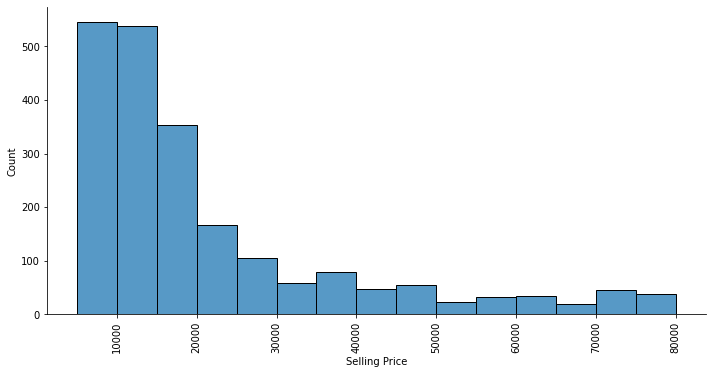

In [ ]:
sns.displot(df_phones, x='Selling Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000], aspect=2)
plt.xticks(rotation = 90)

In [ ]:
from sklearn.preprocessing import StandardScaler
def standardise(column, pct, pct_lower):
    sc = StandardScaler() 
    y = df_phones[column].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y): int(pct * len_y)]
    len_y = len(y)
    yy= ([[x] for x in y])
    sc.fit(yy)
    y_std = sc.transform(yy)
    y_std = y_std.flatten()
    return y_std, len_y, y

In [ ]:
from scipy import stats as st
def fit_distribution(column, pct, pct_lower):
    y_std, size, y_org = standardise(column, pct, pct_lower)
    dist_names = ['weibull_min', 'norm', 'weibull_max', 'beta', 'invgauss', 'uniform', 'gamma', 'expon', 'lognorm', 'pearson3', 'triang']
    chi_square_statistics = []
    percentile_bins = np.linspace(0, 100, 11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(y_std)
        print(f"{dist_name}\n{param}\n")
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum(((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)
    print('\nDistributions listed by Betterment of fit:')
    print('............................................')
    print(results)

In [ ]:
fit_distribution('Selling Price', 0.99, 0.01)

weibull_min
(1.0410022456539691, -0.9094606608396796, 0.9262720452845498)

norm
(-4.76274979981634e-17, 0.9999999999999999)

weibull_max
(0.5830317890060995, 4.838468930614036, 1.4341610396628215)



/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


beta
(1.1608358965277734, 2237079322.077322, -0.909567730585553, 1771134966.0603561)

invgauss
(1.0007219972105799, -0.9821126689286914, 0.9814105457462033)

uniform
(-0.9094409699013914, 5.747909900515427)

gamma
(1.1840189411103241, -0.9096002540497019, 0.7682269181412713)

expon
(-0.9094409699013914, 0.9094409699013914)

lognorm
(0.9097399222426987, -0.941316744783449, 0.6172215879550859)

pearson3
(1.8380651944673043, -4.4511627097942555e-17, 0.8359516412256605)

triang
(4.552852207539993e-10, -1.1243209490849089, 6.13477171531043)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
8       lognorm        66.0
4      invgauss        75.0
6         gamma       228.0
9      pearson3       228.0
3          beta       238.0
0   weibull_min       286.0
7         expon       342.0
1          norm      2994.0
10       triang      3597.0
5       uniform      5796.0
2   weibull_max      9736.0


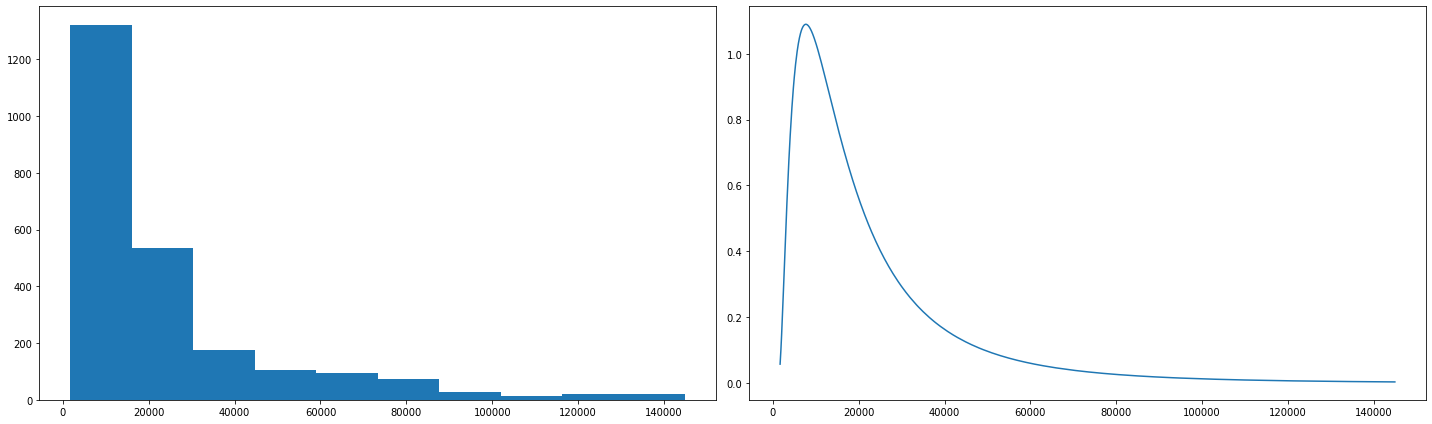

In [ ]:
y_std, len_y, y = standardise('Selling Price', 0.99, 0.01)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axes[0].hist(y)
axes[1].plot(y,st.lognorm.pdf(y_std,0.90, -0.94, 0.61))
fig.tight_layout()

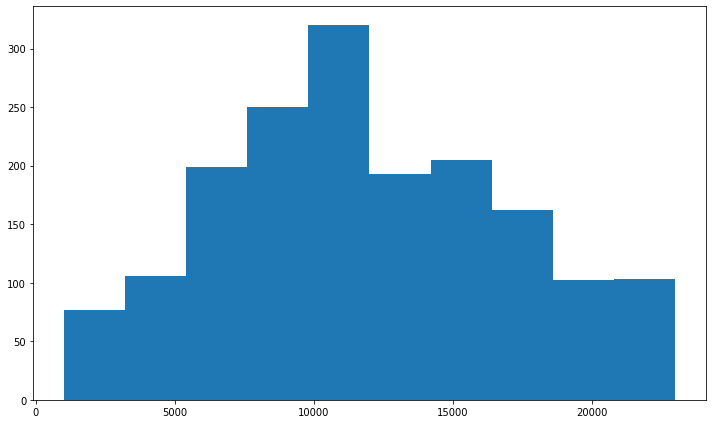

In [ ]:
df_sell = [x for x in df_phones['Selling Price'] if x < 23000]
fig, axes = plt.subplots(figsize=(10, 6))
axes.hist(df_sell)
fig.tight_layout()

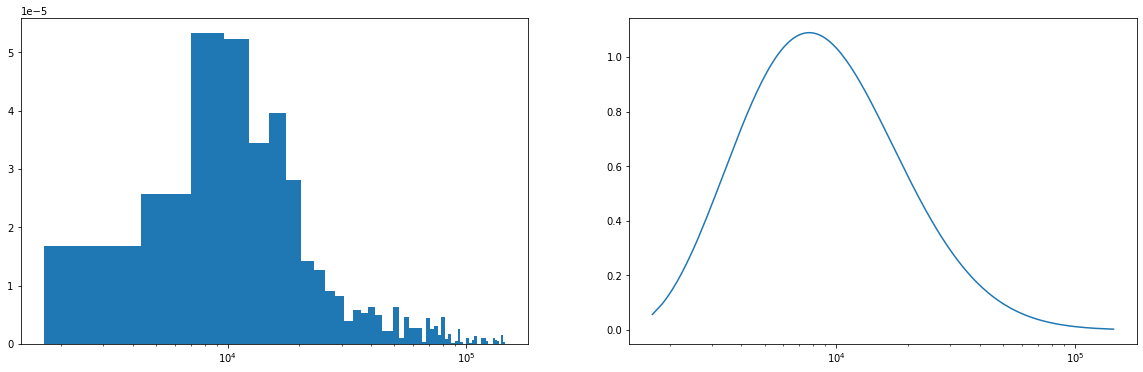

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(y, bins='auto', density=True)
ax2.plot(y, st.lognorm.pdf(y_std, 0.90, -0.94, 0.61))
ax1.set_xscale('log')
ax2.set_xscale('log')